# Homework 7 - Seth Nielsen - ME 537

## Problem 1

In [ ]:
q = [0.03763,0.85985,2.98853,2.51176e-07,2.43481,-0.03763]*0.5;

pts = 50;
q_arr = zeros(pts*4,6);
x_arr = zeros(pts*4,1);
y_arr = zeros(pts*4,1);
x0 = 0.552;
y0 = -0.1294;
z  = -0.01435;

l = 1.0;
x = linspace(x0,x0+l,pts);
y = linspace(y0,y0+l,pts);

for i=1:pts
    q_arr(i,:) = q;
    Tc = robot.fkine(q);         % from base to current location
    Td = transl(x(i), y(1), z);  % from base to desired location

    Tcd = double(inv(Tc)) * Td;

    v = Tcd(1:3,4);
    R = Tcd(1:3,1:3);

    theta = acos((trace(R)-1)/2);
    u = [R(3,2)-R(2,3);
         R(1,3)-R(3,1);
         R(2,1)-R(1,2)] * 1/(2*sin(theta));

    w = u * theta;

    ksi_dot = [v; w];
    q_dot = inv(robot.jacob0(q)) * ksi_dot;

    q = q + q_dot';

end

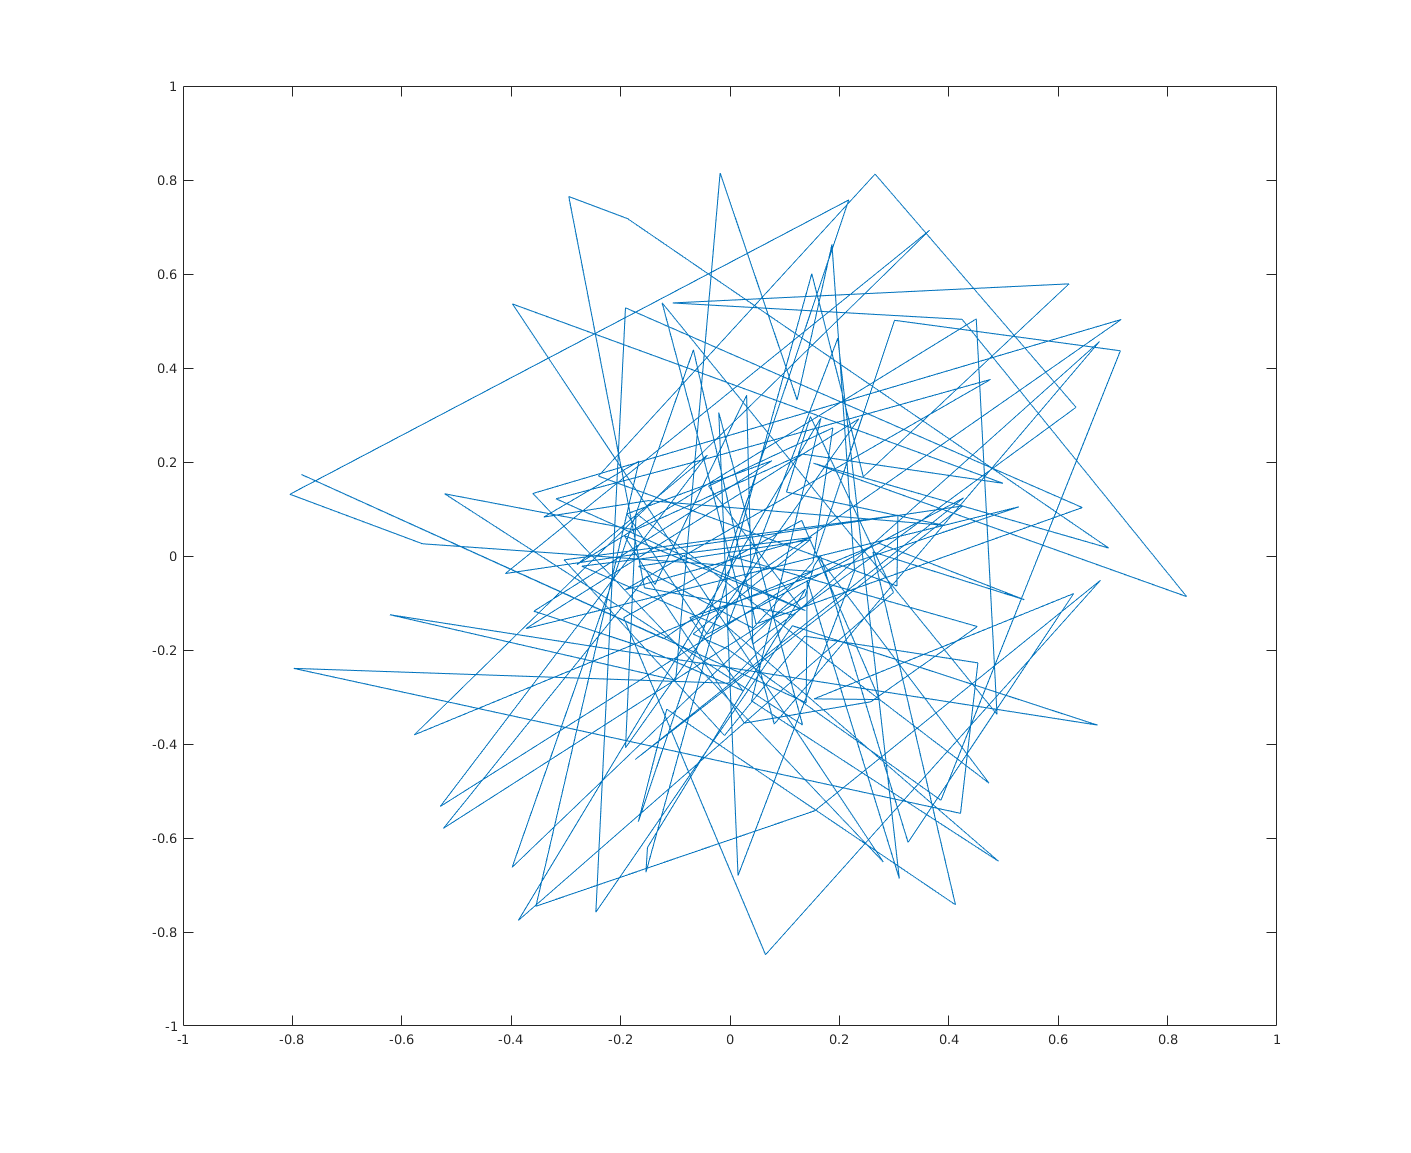

Unfortunately, my code had a bug somewhere that I was unable to find. I believe the process is close to correct, but something was missing.

I believe that this controller would be okay to use when there will be no unknowns, disturbances, etc. and the path needed to follow is already known. In this case, the path was a simple square and there were zero obstructions or disturbances, so it worked (had my code not had problems). 

### Problems 2 and 3 - I did not have time to complete these problems.